In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(1794)
tf.random.set_seed(1794)
tf.keras.backend.set_floatx("float64")

In [3]:
import scipy.io
import trieste
import gpflow
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt
from obj_fun import obj_fun

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:



import obj_fun
from functools import partial
from trieste.models.gpflux import DeepGaussianProcess, build_vanilla_deep_gp
from trieste.acquisition.rule import DiscreteThompsonSampling
from functools import wraps

In [5]:

def build_dgp_model(data, search_space):

    dgp = partial(
        build_vanilla_deep_gp,
        data,
        search_space,
        3,
        100,
        likelihood_variance=1e-5,
        trainable_likelihood=False,
    )
    return DeepGaussianProcess(dgp)


------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------


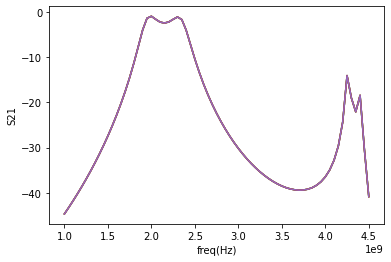

In [10]:
mins=np.array([5,.3])
maxs=np.array([25,1.2])
search_space = trieste.space.Box(mins,maxs)
observer = trieste.objectives.utils.mk_observer(obj_fun.obj_fun)
num_initial_points   = 5
initial_query_points = search_space.sample_halton(num_initial_points)
initial_data         = observer(initial_query_points)

In [8]:
dgp_model = build_dgp_model(initial_data, search_space)

AttributeError: 'functools.partial' object has no attribute 'f_layers'

In [9]:
num_steps=20

In [117]:
acq  = trieste.acquisition.ExpectedImprovement()
rule = trieste.acquisition.rule.EfficientGlobalOptimization(builder=acq)

------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUNNING MOMENTUM SIMULATION ------
------ COMPLETED ------
------ RUN

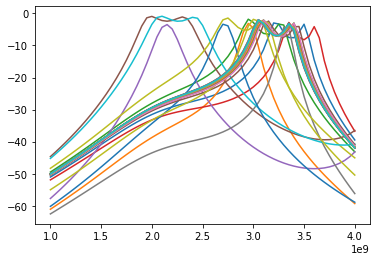

In [34]:
bo  = trieste.bayesian_optimizer.BayesianOptimizer(observer, search_space)
result = bo.optimize(40, initial_data, dgp_model, acquisition_rule = rule)

In [35]:
dgp_dataset = result.try_get_final_dataset()

In [36]:
dgp_query_points = dgp_dataset.query_points.numpy()
dgp_observations = dgp_dataset.observations.numpy()

In [37]:
dgp_arg_min_idx = tf.squeeze(tf.argmin(dgp_observations, axis=0))

print(f"query point: {dgp_query_points}")
print(f"observation: {dgp_observations}")

query point: [[ 7.79420395  0.54711166]
 [22.79420395  0.84711166]
 [12.79420395  1.04711166]
 [15.29420395  0.44711166]
 [ 5.29420395  0.74711166]
 [20.29420395  0.94711166]
 [10.29420395  0.34711166]
 [19.04420395  0.64711166]
 [ 9.04420395  1.18044499]
 [24.04420395  0.58044499]
 [ 6.24068942  0.3       ]
 [11.2569031   1.2       ]
 [ 9.01952265  0.3       ]
 [ 5.          0.3       ]
 [25.          1.2       ]
 [25.          0.3       ]
 [ 7.66480656  0.3       ]
 [ 6.84404114  1.2       ]
 [11.86339137  0.3       ]
 [22.78130948  0.3       ]
 [14.72183221  1.19989276]
 [ 7.76607227  0.3       ]
 [ 7.83343048  0.3       ]
 [ 7.76472856  0.3       ]
 [ 7.73473646  0.3       ]
 [ 7.10029201  0.3       ]
 [ 7.81551717  0.3       ]
 [ 7.78216916  0.3       ]
 [ 9.88978796  0.64959416]
 [ 7.87749975  0.3       ]
 [ 7.81783223  0.3       ]
 [ 7.55583742  0.3       ]
 [ 7.45240922  0.3       ]
 [ 7.90102682  0.3       ]
 [ 7.75929966  0.3       ]
 [ 7.93668622  0.3       ]
 [ 7.40273727  

In [40]:
type(dgp_query_points)

numpy.ndarray

In [42]:
dgp_query_points.size

80

In [43]:
L=dgp_query_points[:,0]

In [44]:
L

array([ 7.79420395, 22.79420395, 12.79420395, 15.29420395,  5.29420395,
       20.29420395, 10.29420395, 19.04420395,  9.04420395, 24.04420395,
        6.24068942, 11.2569031 ,  9.01952265,  5.        , 25.        ,
       25.        ,  7.66480656,  6.84404114, 11.86339137, 22.78130948,
       14.72183221,  7.76607227,  7.83343048,  7.76472856,  7.73473646,
        7.10029201,  7.81551717,  7.78216916,  9.88978796,  7.87749975,
        7.81783223,  7.55583742,  7.45240922,  7.90102682,  7.75929966,
        7.93668622,  7.40273727,  7.9630317 ,  7.79977614,  7.87802101])

In [45]:
G=dgp_query_points[:,1]

In [47]:
import matplotlib.pyplot as plt
from scipy.stats import qmc
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

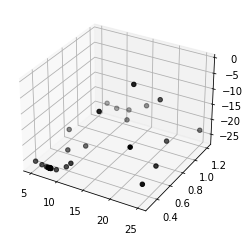

In [92]:
fig = plt.figure()
ax =plt.axes(projection='3d', computed_zorder=False)
ax.scatter( L, G, dgp_observations,color='k')


In [100]:
mins=np.array([5,.3])
maxs=np.array([25,1.2])
search_space = trieste.space.Box(mins,maxs)
observer = trieste.objectives.utils.mk_observer(obj_fun.obj_fun)
num_initial_points   = 3000
initial_query_points = search_space.sample_halton(num_initial_points)

In [101]:
initial_query_points3=np.array(initial_query_points2)
initial_query_points3.shape

(1000, 2)

In [102]:
pridict=dgp_model.predict(initial_query_points2)

In [103]:
pridict2=np.array(pridict)
pridict2[0]

array([[-1.51573983e+01],
       [-2.29473560e+01],
       [-9.27055987e-01],
       [-1.75724918e+01],
       [-2.37406903e+01],
       [-2.62189595e+01],
       [-1.35859181e+00],
       [-2.38220051e+01],
       [-4.45949552e+00],
       [-2.37758590e+01],
       [-1.62752406e+01],
       [-1.92743696e+01],
       [-1.96054421e+01],
       [-2.36037048e+01],
       [ 2.51582224e+00],
       [-2.22249282e+01],
       [-1.83497800e+01],
       [-2.54923475e+01],
       [-5.86980340e-01],
       [-1.96822152e+01],
       [-2.27918256e+01],
       [-2.48877153e+01],
       [-8.81772936e+00],
       [-2.48758771e+01],
       [-8.92915493e+00],
       [-2.36110235e+01],
       [-4.66684427e+00],
       [-2.12900038e+01],
       [-2.26839210e+01],
       [-2.59037905e+01],
       [-4.35839794e-01],
       [-2.32809975e+01],
       [-6.48813785e+00],
       [-2.44967381e+01],
       [-7.59508404e+00],
       [-1.59419297e+01],
       [-2.35568846e+01],
       [-2.34012984e+01],
       [ 1.6

In [104]:
G_grid = np.linspace(5,25,200)
L_grid = np.linspace(.3,1.2,200)
G_mesh,L_mesh = np.meshgrid(G_grid,L_grid)

In [105]:
from scipy.interpolate import griddata
z_grid = griddata(initial_query_points3,pridict2[0].flatten(),(G_mesh,L_mesh), method = 'linear')

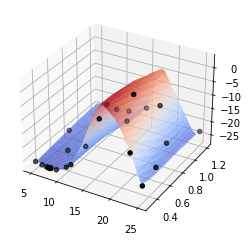

In [107]:
from matplotlib import cm
fig = plt.figure()
ax =plt.axes(projection='3d', computed_zorder=False)
ax.plot_surface(G_mesh,L_mesh,z_grid,cmap=cm.coolwarm, alpha=0.8,zorder=-1)
ax.scatter( L, G, dgp_observations,color='k')